# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [13]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("gdrive/My Drive/UCI_HAR_Dataset/HAR/UCI_HAR_Dataset")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import numpy as np
import pandas as pd
import os
import random
from numpy.random import seed
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
import keras.backend as K
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# get the features from the file features.txt
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


## Obtain the  train data 

In [0]:
x_path_train = 'train/X_train.txt'
x_path_test  = 'test/X_test.txt'
# Obtaing X_train
with open(x_path_train) as f:
    container = f.readlines()
result = []
for line in container:
    tmp1 = line.strip()
    tmp2 = tmp1.replace('  ', ' ')     # removes inconsistent blank spaces
    tmp_ary = list(map(float, tmp2.split(' ')))
    result.append(tmp_ary)
X_train_all = np.array(result)
# Obtaing X_test
with open(x_path_test) as f:
    container = f.readlines()
result = []
for line in container:
    tmp1 = line.strip()
    tmp2 = tmp1.replace('  ', ' ')     # removes inconsistent blank spaces
    tmp_ary = list(map(float, tmp2.split(' ')))
    result.append(tmp_ary)
X_test_all = np.array(result)

## Obtain the  test data 

In [0]:
y_path_train = 'train/y_train.txt'
y_path_test  = 'test/y_test.txt'
with open(y_path_train) as f:
    container = f.readlines()
result = []
for line in container:
    num_str = line.strip()
    result.append(int(num_str))
y_train_all = np.array(result)
with open(y_path_test) as f:
    container = f.readlines()
result = []
for line in container:
    num_str = line.strip()
    result.append(int(num_str))
y_test_all = np.array(result)

In [21]:
print("Shape of X_train :{} & y_train :{}".format(X_train_all.shape,y_train_all.shape))
print("Shape of X_test  :{} & y_test  :{}".format(X_test_all.shape,y_test_all.shape))

Shape of X_train :(7352, 561) & y_train :(7352,)
Shape of X_test  :(2947, 561) & y_test  :(2947,)


In [0]:
def sharpen(x_test, sigma, alpha):
    r = x_test.shape[0]
    c = x_test.shape[1]
    container = np.empty((r, c))
    i = 0

    for row in x_test:
        test = np.array([row])
        blurred = ndimage.gaussian_filter(test, sigma)
        sharpened = test + alpha * (test - blurred)
        container[i] = sharpened
        i = i + 1
    return container

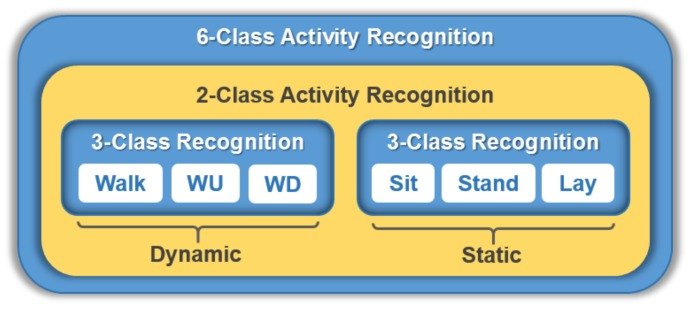

In [17]:
from IPython.display import display, Image
display(Image(filename='divide.jpg'))

# Obtaining Static Data From Our Dataset

HERE WE WILL GET THE INDEXES OF THE ACTICITIES WHOSE LABEL IS 4,5,6 WE DIVIDE THEM INTO THREE VARIABLES AND THEN WE CONCATENATE THEM 

AFTER THAT WE CREATED A LIST OF ALL THE INDEXES WHICH CONTAINS OUR STATIC 

In [0]:
static_1 = np.where(y_train_all == 4)[0]
static_2 = np.where(y_train_all == 5)[0]
static_3 = np.where(y_train_all == 6)[0]
static = np.concatenate([static_1, static_2, static_3])
static_list = static.tolist()

In [24]:
print("Shape of static_1 : {} & Shape of static_2 : {} & Shape of static_3 : {}".format(static_1.shape,static_2.shape,static_3.shape))
temp = np.where(y_train_all > 3 )[0]
print("Shape of y_train_all for Activities 4 , 5 ,6 :",temp.shape)
print("We can see the shape is matching to our train data")
print("1286 + 1374 + 1407 =",1286 + 1374 + 1407)

Shape of static_1 : (1286,) & Shape of static_2 : (1374,) & Shape of static_3 : (1407,)
Shape of y_train_all for Activities 4 , 5 ,6 : (4067,)
We can see the shape is matching to our train data
1286 + 1374 + 1407 = 4067


In [0]:
# Shuffle static data index
import random
r = random.random()
random.shuffle(static_list, lambda: r)

In [0]:
X_train = X_train_all[static]
y_train = y_train_all[static]

In [0]:
# Convert (4, 5, 6) labels to (0, 1, 2)
y_train  = y_train - 4

In [28]:
print ("train_static shape: ", X_train.shape)

train_static shape:  (4067, 561)


In [0]:
static_1 = np.where(y_test_all == 4)[0]
static_2 = np.where(y_test_all == 5)[0]
static_3 = np.where(y_test_all == 6)[0]
static = np.concatenate([static_1, static_2, static_3])

In [0]:
X_test = X_test_all[static]
y_test = y_test_all[static]

In [0]:
# Convert (4, 5, 6) labels to (0, 1, 2)
y_test  = y_test - 4

In [32]:
print ("test_static shape: ", X_test.shape)

test_static shape:  (1560, 561)


In [0]:
n_classes = 3

# Convert to one hot encoding vector
y_train_static_oh = np.eye(n_classes)[y_train]

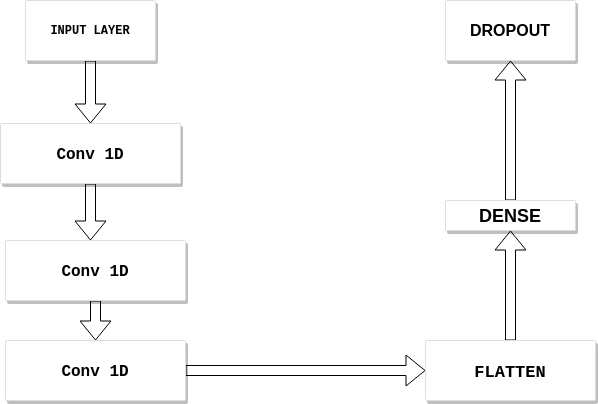

In [15]:
from IPython.display import display, Image
display(Image(filename='Static.png'))

In [34]:
# Fit 1d CNN for static HAR

seed(2017)
model = Sequential()
model.add(Conv1D(30, 3, input_shape=(561, 1), activation='relu'))
model.add(Conv1D(50, 3, activation='relu'))
model.add(Conv1D(100, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.add(Dropout(0.50))

adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

# Summarize layers
print(model.summary())

W0703 06:56:23.298175 139679021356928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 06:56:23.344070 139679021356928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 06:56:23.355069 139679021356928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 06:56:23.465108 139679021356928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0703 06:56:23.478670 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 559, 30)           120       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 557, 50)           4550      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 555, 100)          15100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 55500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 166503    
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
Total params: 186,273
Trainable params: 186,273
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
new_dir = 'model/static.hdf5'
if not os.path.exists(new_dir):
    os.makedirs(new_dir)
fpath = new_dir + 'weights.{epoch:02d}-{val_acc:.2f}.hdf5'

cp_cb = ModelCheckpoint(fpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)

In [36]:
history = model.fit(np.expand_dims(X_train, axis=2), y_train_static_oh,
          batch_size=32, epochs=100, verbose=1, validation_split=0.2, callbacks=[cp_cb])

W0703 06:56:43.990327 139679021356928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3253 samples, validate on 814 samples
Epoch 1/100
3253/3253 [==============================] - 7s 2ms/step - loss: 0.3174 - acc: 0.4141 - val_loss: 0.1536 - val_acc: 0.9779

Epoch 00001: val_loss improved from inf to 0.15364, saving model to model/weights.01-0.98.hdf5
Epoch 2/100
3253/3253 [==============================] - 1s 359us/step - loss: 0.2625 - acc: 0.5106 - val_loss: 0.0554 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.15364 to 0.05542, saving model to model/weights.02-1.00.hdf5
Epoch 3/100
3253/3253 [==============================] - 1s 344us/step - loss: 0.2535 - acc: 0.5244 - val_loss: 0.0412 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.05542 to 0.04118, saving model to model/weights.03-1.00.hdf5
Epoch 4/100
3253/3253 [==============================] - 1s 340us/step - loss: 0.2415 - acc: 0.5453 - val_loss: 0.0620 - val_acc: 0.9877

Epoch 00004: val_loss did not improve from 0.04118
Epoch 5/100
3253/3253 [==============================] - 1s

Train_Accuracy 0.9975411851487583


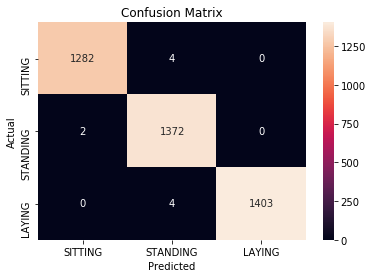

In [61]:
pred_train = model.predict(np.expand_dims(X_train, axis=2), batch_size=32)
print("Train_Accuracy",accuracy_score(y_train, np.argmax(pred_train, axis=1)))
conf_matrix = confusion_matrix(y_train ,np.argmax(pred_train, axis=1))
class_label = ['SITTING','STANDING','LAYING']
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
sn.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Train_Accuracy 0.9615384615384616


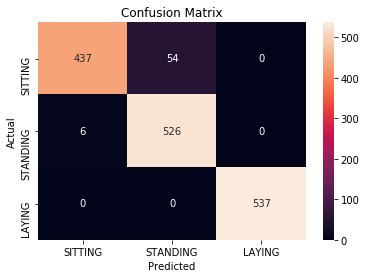

In [62]:
pred_test = model.predict(np.expand_dims(X_test, axis=2), batch_size=32)
print("Train_Accuracy",accuracy_score(y_test, np.argmax(pred_test, axis=1)))
conf_matrix = confusion_matrix(y_test ,np.argmax(pred_test, axis=1))
class_label = ['SITTING','STANDING','LAYING']
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
sn.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [0]:
del model
K.clear_session()

# Obtaing Dynamic Data From Our Dataset

In [0]:
# Select dynamic HAR train data

dynamic_1 = np.where(y_train_all == 1)[0]
dynamic_2 = np.where(y_train_all == 2)[0]
dynamic_3 = np.where(y_train_all == 3)[0]
dynamic = np.concatenate([dynamic_1, dynamic_2, dynamic_3])
dynamic_list = dynamic.tolist()

In [0]:
# Shuffle dynamic data index
r = random.random()
random.shuffle(dynamic_list, lambda: r)

In [0]:
dynamic = np.array(dynamic_list)

X_train = X_train_all[dynamic]
y_train = y_train_all[dynamic]

In [0]:
# Convert (1, 2, 3) labels to (0, 1, 2)
y_train  = y_train - 1

In [70]:
print ("train_dynamic shape: ", X_train.shape)

train_dynamic shape:  (3285, 561)


In [0]:
# Select dynamic HAR test data

dynamic_1 = np.where(y_test_all == 1)[0]
dynamic_2 = np.where(y_test_all == 2)[0]
dynamic_3 = np.where(y_test_all == 3)[0]
dynamic = np.concatenate([dynamic_1, dynamic_2, dynamic_3])

In [0]:
X_test = X_test_all[dynamic]
y_test = y_test_all[dynamic]

In [0]:
# Convert (1, 2, 3) labels to (0, 1, 2)
y_test  = y_test - 1

In [74]:
print ("test_dynamic shape: ", X_test.shape)

test_dynamic shape:  (1387, 561)


In [0]:
# Convert to one hot encoding vector
y_train_dynamic_oh = np.eye(n_classes)[y_train]

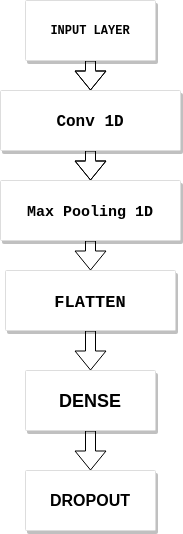

In [14]:
from IPython.display import display, Image
display(Image(filename='Dynamic.png'))

In [77]:
# Fit 1d CNN for dynamic HAR
from keras.layers import MaxPooling1D
seed(2017)
model = Sequential()
model.add(Conv1D(100, 3, input_shape=(561, 1), activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.add(Dropout(0.5))

adam = Adam(lr=0.0004, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

# Summarize layers
print(model.summary())

W0703 07:33:52.570039 139679021356928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 559, 100)          400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 186, 100)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 55803     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
Total params: 56,203
Trainable params: 56,203
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
new_dir = 'model/'
fpath = new_dir + 'weights.{epoch:02d}-{val_acc:.2f}.hdf5'

cp_cb = ModelCheckpoint(fpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)

In [79]:
history = model.fit(np.expand_dims(X_train, axis=2), y_train_dynamic_oh,
          batch_size=32, epochs=50, verbose=2, validation_split=0.2, callbacks=[cp_cb])

Train on 2628 samples, validate on 657 samples
Epoch 1/50
 - 1s - loss: 0.2756 - acc: 0.5088 - val_loss: 0.1735 - val_acc: 0.6317

Epoch 00001: val_loss improved from inf to 0.17350, saving model to model/weights.01-0.63.hdf5
Epoch 2/50
 - 1s - loss: 0.2448 - acc: 0.5426 - val_loss: 0.1088 - val_acc: 0.8600

Epoch 00002: val_loss improved from 0.17350 to 0.10884, saving model to model/weights.02-0.86.hdf5
Epoch 3/50
 - 1s - loss: 0.2349 - acc: 0.5559 - val_loss: 0.1127 - val_acc: 0.8402

Epoch 00003: val_loss did not improve from 0.10884
Epoch 4/50
 - 1s - loss: 0.2379 - acc: 0.5445 - val_loss: 0.1600 - val_acc: 0.6514

Epoch 00004: val_loss did not improve from 0.10884
Epoch 5/50
 - 1s - loss: 0.2323 - acc: 0.5635 - val_loss: 0.1427 - val_acc: 0.7123

Epoch 00005: val_loss did not improve from 0.10884
Epoch 6/50
 - 1s - loss: 0.2331 - acc: 0.5582 - val_loss: 0.0909 - val_acc: 0.9209

Epoch 00006: val_loss improved from 0.10884 to 0.09087, saving model to model/weights.06-0.92.hdf5
Epo

Train_Accuracy 0.9683409436834094


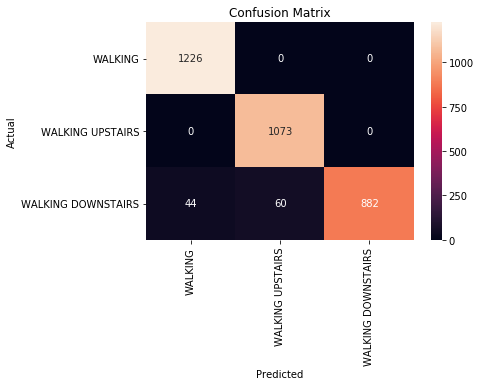

In [82]:
pred_train = model.predict(np.expand_dims(X_train, axis=2), batch_size=32)
print("Train_Accuracy",accuracy_score(y_train, np.argmax(pred_train, axis=1)))
conf_matrix = confusion_matrix(y_train ,np.argmax(pred_train, axis=1))
class_label = ['WALKING','WALKING UPSTAIRS','WALKING DOWNSTAIRS']
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
sn.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Train_Accuracy 0.9567411679884643


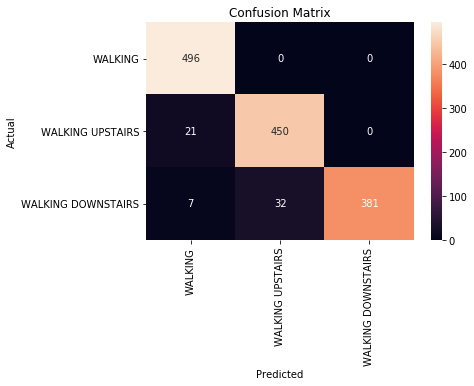

In [84]:
pred_test = model.predict(np.expand_dims(X_test, axis=2), batch_size=32)
print("Train_Accuracy",accuracy_score(y_test, np.argmax(pred_test, axis=1)))
conf_matrix = confusion_matrix(y_test ,np.argmax(pred_test, axis=1))
class_label = ['WALKING','WALKING UPSTAIRS','WALKING DOWNSTAIRS']
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
sn.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [6]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Model','Data','Accuracy on Train','Accuracy on Test']
x.add_row(['CNN','Static',99.75,96.15])
x.add_row(['CNN','Dynamic',96.83,95.67])
print(x)

+-------+---------+-------------------+------------------+
| Model |   Data  | Accuracy on Train | Accuracy on Test |
+-------+---------+-------------------+------------------+
|  CNN  |  Static |       99.75       |      96.15       |
|  CNN  | Dynamic |       96.83       |      95.67       |
+-------+---------+-------------------+------------------+


# Conclusions :

####  Here we Divided our data into two parts
 + Static
 + Dynamic
#### Static Data contains three activities which are:
      + Standing
      + Sitting
      + Laying

#### Second Division
 + =========================================
 #### Dynamic Data is divided into following three categories
    + Walking
    + Walking Upstairs
    + Walking Downstairs

<b>After that we build a CNN model on top of this<b>
    <br><b>After Building The CNN Model The Accuracy we got on Test Data is:
    <br>Accuracy on Static : 96.15 %
    <br>Accuracy on Dynamic: 95.67 %
    
<br> Therefore We got a good Accuracy and we saved our models into a hdf5 file

### References:

https://github.com/heeryoncho/sensors2018cnnhar/tree/master/har <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5949027/